In [5]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline #魔法命令，用于在jupyter 环境中正常显示图表
plt.rcParams['font.sans-serif']=['SimHei'] #用来在图中正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来在图中正常显示负号

datename = '180101To220825'
pricefilename = '{}{}{}'.format('data/price_',datename,'.pkl')
premfilename = '{}{}{}'.format('data/prem_',datename,'.pkl')
day_returnfilename = '{}{}{}'.format('data/day_return_',datename,'.pkl')
price100filename = '{}{}{}'.format('data/price100_',datename,'.pkl')
prem100filename = '{}{}{}'.format('data/prem100_',datename,'.pkl')

pricedf=pd.read_pickle(pricefilename)  #构建收盘价矩阵
premdf=pd.read_pickle(premfilename)    #构造溢价率矩阵。
day_return=pd.read_pickle(day_returnfilename)  #构建收益率矩阵
#求出因子
factor=pricedf

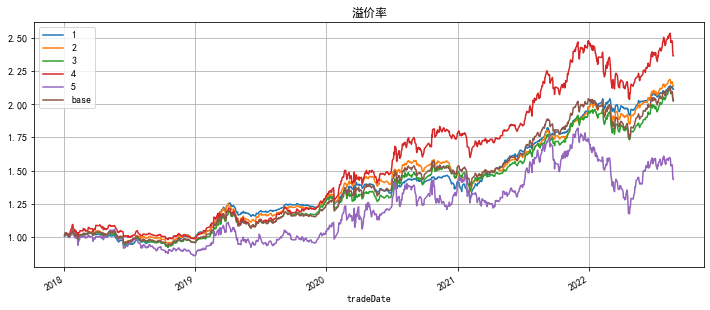

In [7]:
def group_analysis(factor,forward_return,num=5,title=""):    
    cutfactor=factor.rank(axis=1).apply(lambda x:pd.qcut(x,num,range(1,num+1)),axis=1)
    result=pd.DataFrame()
    for group in range(1,1+num):
        group_return=forward_return[cutfactor==group].sum(axis=1)/(cutfactor==group).sum(axis=1)
        result[group]=group_return
    result['base']=(forward_return[~factor.isna()]).sum(axis=1)/(~factor.isna()).sum(axis=1)
    (result+1).cumprod().plot(figsize=(12,5),grid=True,title=title);
    return result
group_analysis(pricedf,day_return,title="溢价率");